# 1D Ising Model
The 1D Ising model using the metropolis-based Monte Carlo method, as described in Fig. 8.8 Schroeder (an undergraduate statistical mechanics/thermodynamics textbook). The magnetization M, the average energy U, the heat capacity C, and the magnetic susceptibility χ are all plotted as functions of temperature.

In [1]:
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

from numba import jit, njit
import numpy as np

import random
import time

Loading BokehJS ...

In [108]:
# Helper functions

# Calculate magnetization. 
# Magnetization is the sum of all spins divided by the total number of spins
@njit(fastmath=True)
def calcM(s, length):
    m = np.abs(s.sum())
    return m/length

# Calculate interaction energy between spins. Assume periodic boundaries
# Interaction energy will be the difference in energy due to flipping spin i,j 
# (i.e. 2*spin_value*neighboring_spins)
@njit(fastmath=True)
def deltaU(s, i, length):
    alpha = 1
    # Nearest neighbors
    # left
    if i == 0:
        l = s[length-1]  # periodic boundary
    else:
        l = s[i-1]
    # right
    if i == length-1:
        r = s[0]  # periodic boundary
    else:
        r = s[i+1]
        
    # Next nearest neighbors
    # left left
    if i == 1:
        ll = s[length-1]  # periodic boundary
    elif i == 0:
        ll = s[length-2]  # periodic boundary
    else:
        ll = s[i-2]
    # right right
    if i == length-1:
        rr = s[1]  # periodic boundary
    elif i == length-2:
        rr = s[0]  # periodic boundary
    else:
        rr = s[i+2]
    return 2*s[i]*(r+l) + 2*s[i]*(rr+ll)/(2**alpha)  # difference in energy if i,j is flipped
    #return 2*s[i]*(r+l)  # difference in energy if i,j is flipped

# Monte carlo cycle
@njit(fastmath=True)
def montecc(s, T, cycles, length):
    for m in range(cycles):
        i = random.randrange(length)  # choose random site
        ediff = deltaU(s, i, length)
        if ediff <= 0:
            s[i] = -s[i]  # flip spin
        elif random.random() < np.exp(-ediff/T):
            s[i] = -s[i]
    return s

# Compute physical quantities
@njit(fastmath=True)
def computePQ(s, T, cycles, length):
    Mg = 0
    Mg_sq = 0
    for p in range(cycles):
        s = montecc(s, T, 1, length)
        M = calcM(s, length)
        Mg += M
        Mg_sq += M*M
    sus = (Mg_sq/cycles-(Mg/cycles)**2)/T
    return sus

In [109]:
# Initial parameters
length1 = 64  # length of spin chain
s = np.random.choice([1,-1], size=(length1))  # initial spin sites randomly (+1 or -1)
cycles = 2000000

# Initlaize temperature range (crosses critical temperature)
temps = np.arange(0.5, 1.8, 0.02)

# Inititalize magnetization, average energy, heat capacity, and susceptibility
sus1 = np.zeros(len(temps))

start = time.time()
# Compute physical quanities (magnetization, etc.)
for ind, T in enumerate(temps):
    # Cycle spins
    s = montecc(s, T, cycles, length1)
    sus1[ind] = computePQ(s, T, cycles, length1)
end = time.time()
print("Elapsed = %s" % (end - start))

Elapsed = 16.92004108428955


In [110]:
# Initial parameters

length2 = 128  # length of spin chain
s = np.random.choice([1,-1], size=(length2))  # initial spin sites randomly (+1 or -1)

# Inititalize magnetization, average energy, heat capacity, and susceptibility
sus2 = np.zeros(len(temps))

start = time.time()
# Compute physical quanities (magnetization, etc.)
for ind, T in enumerate(temps):
    # Cycle spins
    s = montecc(s, T, cycles, length2)
    sus2[ind] = computePQ(s, T, cycles, length2)
end = time.time()
print("Elapsed = %s" % (end - start))

Elapsed = 15.880181074142456


In [111]:
# Initial parameters

length3 = 256  # length of spin chain
s = np.random.choice([1,-1], size=(length3))  # initial spin sites randomly (+1 or -1)

# Inititalize magnetization, average energy, heat capacity, and susceptibility
sus3 = np.zeros(len(temps))

start = time.time()
# Compute physical quanities (magnetization, etc.)
for ind, T in enumerate(temps):
    # Cycle spins
    s = montecc(s, T, cycles, length3)
    sus3[ind] = computePQ(s, T, cycles, length3)
end = time.time()
print("Elapsed = %s" % (end - start))

Elapsed = 17.12792706489563


## Data Collapse to Compute Critical Exponents
nu = 1.3
eta = 1.75
tc = 0.38
for normal 1D Hamiltonian and sizes 32, 128, 64

In [129]:
nu = 1.2
eta = 1.70
tc = 0.68
t = (temps-tc)/tc
x1 = t * (length1)**(1/nu)
y1 = sus1 * (length1)**(eta - 2)
x2 = t * (length2)**(1/nu)
y2 = sus2 * (length2)**(eta - 2)
x3 = t * (length3)**(1/nu)
y3 = sus3 * (length3)**(eta - 2)

#Interactive plot
p = figure(plot_width=700, plot_height=350)
p.line(x1, y1, color='red')
p.line(x2, y2, color='blue')
p.line(x3, y3, color='brown')
show(p)

In [113]:
# Plot calculated stuff

p = figure(plot_width=600, plot_height=400)
p.scatter(temps, sus1, color='red')
p.scatter(temps, sus2, color='blue')
p.scatter(temps, sus3, color='brown')

show(p)

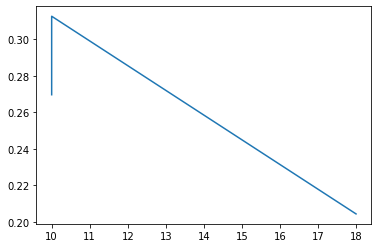

In [8]:
maxs = [max(sus1),max(sus2),max(sus3)]
ts = [np.argmax(sus1),np.argmax(sus2),np.argmax(sus3)]

plt.plot(ts,maxs)
plt.show()